# <u>Knapsack Problem</u> 

# MAIN

In [286]:
import random
import time
from operator import itemgetter
from scipy.stats import beta
import numpy as np
from decimal import *

BRUTE_FORCE = "BRUTE FORCE"
DYNAMIC_PROGRAMMING = "DYNAMIC PROGRAMMING"

GREEDY_FRACTIONAL = "GREEDY FRACTIONAL"
GREEDY_WEIGHT = "GREEDY WEIGHT"
GREEDY_VALUE = "GREEDY VALUE"
GREEDY_RATIO = "GREEDY RATIO"


problem_solutions = []
choosed_items = []


## <span> 1. CLASS </span>

### <span style="color: yellow"> 1. Item </span>

In [287]:
class Item:
  def __init__(self, value, weight):
    self.value = value
    self.weight = weight
  
  def print(item):
    print("value = " + str(item.value) + " - weight = " + str(item.weight), end=' ')

  def print_items(items):
    for i in range(0, len(items)):
      print()
      Item.print(items[i])

#### <span style="color: GREEN"> 1. Total Weight</span>

In [288]:
def compute_total_weight(item):
    total_weight = 0
    
    for i in range(0, len(item)):
        total_weight += item[i].weight

    return total_weight

#### <span style="color: GREEN"> 2. Total Value</span>

In [289]:
def compute_total_value(item):
    total_value = 0
    
    for i in range(0, len(item)):
        total_value += item[i].value

    return total_value

### <span style="color: yellow"> 2. Solution </span>

In [290]:
class Solution:
  def __init__(self, time, name, solution):
    self.name = name
    self.time = time
    self.solution = solution
  
  def print(solution):
    print(solution.name + "\t\t - time = " + str(solution.time) + "\t - solution = " + str(solution.solution), end=' ')

  def print_solutions(solutions):
    for i in range(0, len(solutions)):
      Solution.print(solutions[i])
      print()

## <span> 2. SOURCE DATA </span>

### <span style="color: purple"> 1. input </span>

In [337]:
# Get the number of item from terminal
nb_item = int(input("Enter number of item  - max :"))

# Get the capacity of the knapsack from terminal
capacity = int(input('Enter the capacity of the sac : '))

# clear the choosed items
choosed_items = []

### <span style="color: purple"> 2. Dataset </span>

In [292]:
# clear the choosed items
choosed_items = []

# Using readlines()
file1 = open('./dataset/large_scale/knapPI_2_100_1000_1', 'r')
Lines = file1.readlines()

count = 0

# Strips the newline character
for line in Lines:
    count += 1
    data = line.split()

    if(count == 1):
        # Get the number of item from terminal
        nb_item = int(data[0])

        # Get the capacity of aliment from terminal
        capacity = int(data[1])
        continue

    value = int(data[0])
    weight = int(data[1])

    # fill the list with the object
    choosed_items.append(Item(value, weight))

## <span> 2. GENERATOR </span>

##### <span style="color: blue"> 1. Random generator</span>

In [293]:
def random_generator():

    # generate the aliments randomly
    for i in range (0, nb_item):

      weight = random.randint(1, capacity)
      value = random.randint(1, capacity)
      choosed_items.append(Item(value, weight))

##### <span style="color: blue"> 2. Exponential generator</span>

In [336]:
import math

def exponential_generator():

    # generate the aliments randomly
    for i in range(0, nb_item):

      weight = int(math.exp(i))
      value = random.randint(1, capacity)
      choosed_items.append(Item(value, weight))


## <span> 3. ALGORITHM </span>

##### <span style="color: red"> 1. Brute Force</span>

In [294]:
import itertools

# calculate the total weight of the combination 
def compute_weight(combination_items):
  value, weight = 0, 0
  
  for item in combination_items:
    weight += item.weight
    value += item.value

  return value, weight 

# Brute force algorithm
def brute_force_solution():
  max_value = 0
  solution = ()

  for i in range(len(choosed_items) + 1):

    # create all possible solutions
    for combination_items in itertools.combinations(choosed_items, i):
      value, weight = compute_weight(combination_items) 

      # check the total weight of the combination 
      if value > max_value and weight <= capacity:
        solution = combination_items
        max_value = value

  return solution

##### <span style="color: red"> 2. Dynamic Programming </span>

In [295]:
def dynamic_programming_solution():
    table = [[0 for x in range(capacity + 1)] for x in range(nb_item + 1)] 
    for i in range(nb_item + 1): 
            for j in range(capacity + 1): 
                if i == 0 or j == 0: 
                    table[i][j] = 0
                elif choosed_items[i-1].weight <= j: 
                    table[i][j] = max(choosed_items[i - 1].value  + table[i - 1][j - choosed_items[i - 1].weight],  table[i - 1][j]) 
                else: 
                    table[i][j] = table[i-1][j] 
    return table[nb_item][capacity] 

##### <span style="color: red"> 3. Greedy approach </span>

###### <span> 1. Greedy ratio </span>

In [296]:
def greedy_ratio_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: (x.value/x.weight), reverse=True)
    
    initial_capacity = capacity
    finalvalue = 0.0

    # Looping through all Items
    for item in choosed_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            finalvalue += item.value

    # Returning final value
    return finalvalue

###### <span> 2. Greedy weight </span>

In [297]:
def greedy_weight_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: x.weight, reverse=True)
    
    initial_capacity = capacity
    final_value = 0.0

    # Looping through all Items
    for item in choosed_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            final_value += item.value

    return final_value

###### <span> 3. Greedy value </span>

In [298]:
def greedy_value_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: x.value, reverse=True)
    
    initial_capacity = capacity
    final_value = 0.0

    # Looping through all Items
    for item in sorted_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            final_value += item.value

    return final_value

###### <span> 4. Greedy value </span>

In [299]:
def greedy_fractional_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: (x.value/x.weight), reverse=True)
    
    initial_capacity = capacity
    final_value = 0.0
    
    # Looping through all Items
    for item in choosed_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            final_value += item.value

        else:
            final_value += item.value * capacity / item.weight
            break

    return final_value

## <span> 4. TEST  </span>

### <span style="color: grey"> 1. Generator </span>

#### <span style="color: #DDDD"> 1. Random </span>

In [323]:
random_generator()

#### <span style="color: #DDDD"> 2. Exponential </span>

In [338]:
exponential_generator()

### <span style="color: grey"> 2. Test Information </span>

In [315]:
print("number item : " + str(nb_item))
print("capacity : " + str(capacity))
print("---")
Item.print_items(choosed_items)

number item : 10
capacity : 10
---

value = 9 - weight = 1 
value = 6 - weight = 1.0 
value = 10 - weight = 2.718281828459045 
value = 3 - weight = 7.38905609893065 
value = 5 - weight = 20.085536923187668 
value = 1 - weight = 54.598150033144236 
value = 8 - weight = 148.4131591025766 
value = 4 - weight = 403.4287934927351 
value = 5 - weight = 1096.6331584284585 
value = 4 - weight = 2980.9579870417283 
value = 6 - weight = 8103.083927575384 

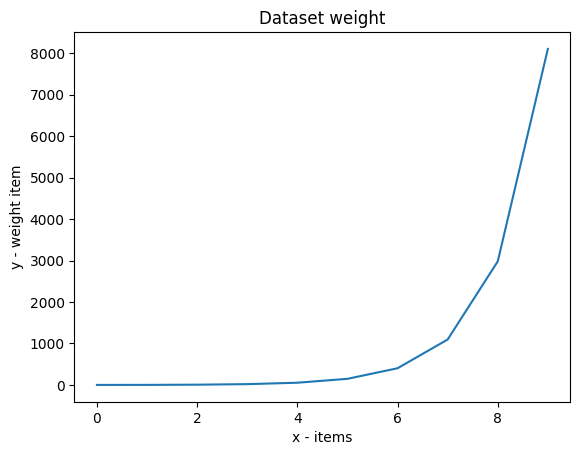

In [339]:
# importing the required module
import matplotlib.pyplot as plt

sorted_items = choosed_items
sorted_items.sort(key=lambda x: x.weight)

x, y = [], []
for i in range (0, len(sorted_items)):
    x.append(i)
    y.append(sorted_items[i].weight)

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('x - items')
# naming the y axis
plt.ylabel('y - weight item')

# giving a title to my graph
plt.title('Dataset weight')

# function to show the plot
plt.show()

### <span style="color: grey"> 3. Brute force</span>

In [340]:
def brute_force_test():
    
    begin = time.time()
    solution = brute_force_solution()
    end = time.time()

    problem_solutions.append(Solution((end - begin), BRUTE_FORCE, compute_total_value(solution)))

    print("brute force = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution brute force = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

brute_force_test()

brute force = 0.0009975433349609375 secondes
solution brute force = 16
---


### <span style="color: grey"> 4. Dynamic programming</span>

In [341]:
def dynamic_programming_test():

    begin = time.time()
    solution = dynamic_programming_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, DYNAMIC_PROGRAMMING, solution))

    print("dynamic  prog = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution dynamic = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")
    
dynamic_programming_test()

dynamic  prog = 0.0 secondes
solution dynamic = 16
---


### <span style="color: grey"> 5. Greedy solution</span>

#### <span style="color: #dddd"> 1. value solution</span>

In [342]:
def greedy_value_test():
    
    begin = time.time()
    solution = greedy_value_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_VALUE, solution))

    print("greedy value = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution dynamic = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_value_test()

greedy value = 0.0 secondes
solution dynamic = 16.0
---


#### <span style="color: #dddd"> 2. weight solution</span>

In [343]:
def greedy_weight_test():
    
    begin = time.time()
    solution = greedy_weight_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_VALUE, solution))

    print("greedy weight = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution dynamic = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_weight_test()

greedy weight = 0.0 secondes
solution dynamic = 16.0
---


#### <span style="color: #dddd"> 3. ratio solution</span>

In [344]:
# ! DIVISION BY ZERO DATASET
def greedy_ratio_test():
    begin = time.time()
    solution = greedy_ratio_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_RATIO, solution))

    print("greedy ratio = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution ratio = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_ratio_test()

greedy ratio = 0.0 secondes
solution ratio = 16.0
---


#### <span style="color: #dddd"> 3. Fractional solution</span>

In [347]:
# ! DIVISION BY ZERO DATASET
def greedy_fractional_test():

    begin = time.time()
    solution = greedy_fractional_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_FRACTIONAL, solution))

    print("greedy fractional = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution ratio = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_fractional_test()

greedy fractional = 0.0 secondes
solution ratio = 20.0
---


### <span style="color: grey"> Display Solutions</span>

In [348]:
Solution.print_solutions(problem_solutions)

DYNAMIC PROGRAMMING		 - time = 0.05385589599609375	 - solution = 1514 
GREEDY VALUE		 - time = 0.0	 - solution = 2015.0 
GREEDY VALUE		 - time = 0.0	 - solution = 996.0 
BRUTE FORCE		 - time = 0.0019936561584472656	 - solution = 25 
BRUTE FORCE		 - time = 0.000985860824584961	 - solution = 13 
BRUTE FORCE		 - time = 0.0009963512420654297	 - solution = 13 
BRUTE FORCE		 - time = 0.0009975433349609375	 - solution = 16 
DYNAMIC PROGRAMMING		 - time = 0.0	 - solution = 16 
GREEDY VALUE		 - time = 0.0	 - solution = 16.0 
GREEDY VALUE		 - time = 0.0	 - solution = 16.0 
GREEDY RATIO		 - time = 0.0	 - solution = 16.0 
GREEDY FRACTIONAL		 - time = 0.0	 - solution = 20.0 
GREEDY FRACTIONAL		 - time = 0.0	 - solution = 20.0 
